<a href="https://colab.research.google.com/github/iciac/PatternFlow/blob/master/alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#


import tensorflow as tf 

def a(): 
    pass

In [0]:
""" 
There should also be a driver script that shows 
example usage or your module and runs to demonstrate the algorithm 
with appropriate plots or visualisations relevant to the algorithm. 
Numpy is allowed in this script so as long as it is for visualisation
or loading data or images.
"""

import tensorflow as tf 
import matplotlib.pyplot as plt 


def main(): 
""" 
This driver shows example usage of the algorithm  
"""

    pass 


In [0]:
import tensorflow as tf 


def intensity_range(image, range_values='image', clip_negative=False):

    if range_values == 'dtype':
        range_values = image.dtype

    if range_values == 'image':
        i_min = tf.min(image)
        i_max = tf.max(image)
    elif range_values in DTYPE_RANGE:
        i_min, i_max = range_values.limits
        if clip_negative:
            i_min = 0
    else:
        i_min, i_max = range_values
    return i_min, i_max



In [0]:
import tensorflow as tf 

def rescale_intensity(image, in_range='image', out_range='dtype'):
    
    dtype = image.dtype

    image = tf.convert_to_tensor(image,dtype=tf.int32)
    dtype = image.dtype



    imin, imax = dtype.limits#()#intensity_range(image, in_range)
    omin, omax = dtype.limits#(clip_negative=True)#)intensity_range(image, out_range, clip_negative=(imin >= 0))

    image = tf.maximum(imin, tf.minimum(image,imax))

    image = (image - imin) / (imax - imin)
    print('a')
    return (image * (omax - omin) + omin)

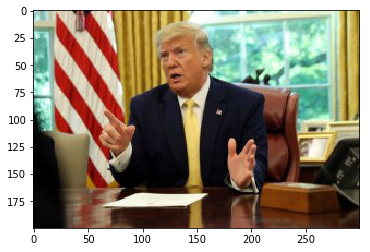

In [1]:
from skimage import io

img1 = io.imread('img1.jpg', plugin='matplotlib') 
import matplotlib.pyplot as plt

plt.imshow(img1)


a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


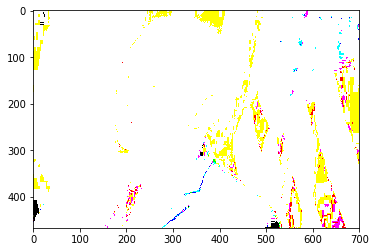

In [0]:
sess = tf.compat.v1.Session()

x = rescale_intensity(img1)

plt.imshow(x.eval(session=sess))

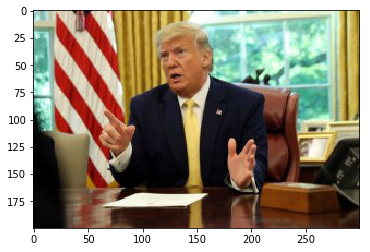

In [14]:
import skimage as sk


rs = sk.exposure.rescale_intensity(img1)
plt.imshow(rs)
#print(rs!=img1)



In [19]:
import numpy as np 

#DTYPE_RANGE = {unit8: [0,255],
          #    unit16': [0,65535],
          #   'unit32': [0,2^32-1],
          #    'float':}

def sk_intensity(image, in_range='image', out_range='dtype'):
    dtype = image.dtype.type

    imin, imax = sk_range(image, in_range)
    omin, omax = sk_range(image, out_range, clip_negative=(imin >= 0))

    image = np.clip(image, imin, imax)

    if imin != imax:
        image = (image - imin) / float(imax - imin)
    return np.asarray(image * (omax - omin) + omin, dtype=dtype)


def sk_range(image, range_values='image', clip_negative=False):

    if range_values == 'dtype':
        range_values = image.dtype.type

    if range_values == 'image':
        i_min = np.min(image)
        i_max = np.max(image)
    elif range_values in DTYPE_RANGE:
        i_min, i_max = DTYPE_RANGE[range_values]
        if clip_negative:
            i_min = 0
    else:
        i_min, i_max = range_values
    return i_min, i_max

image = np.array([-10, 0, 10], dtype=np.int8)
sk_intensity(image, out_range=(0, 127))

NameError: ignored